# E-commerce Customer Behavior Analysis
**Research Question:** *Do new and returning customers have different average order values?*

**Hypothesis Setup:**

***Null Hypothesis (H0)***: The average order value for new customers is equal to the average order value for returning customers.

***Alternative Hypothesis (H1)***: The average order value for new customers is different from that of returning customers.

If there’s a difference, you could make strategic decisions on promotions for new or returning customers.

Significance level, alpha 5%

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(123)

# Define parameters for each customer group
n_samples = 1500
new_mean, new_std = 100, 15 # Mean and stdev for new customers
returning_mean, returning_std = 150, 20 # " " for returning customers

# Generate order values for each group
new_order_values = (np.random.normal(new_mean, new_std, n_samples)).round(2)
returning_order_values = (np.random.normal(returning_mean, returning_std, n_samples)).round(2)

# Check the data types
print(type(new_order_values))  # Should be numpy.ndarray
print(type(returning_order_values))

# Combine data into a DataFrame if both are arrays
if isinstance(new_order_values, np.ndarray) and isinstance(returning_order_values, np.ndarray):
    customer_type = ['new'] * n_samples + ['returning'] * n_samples
    order_values = np.concatenate([new_order_values, returning_order_values])

    data = pd.DataFrame({
        'customer_type': customer_type,
        'order_value': order_values
    })

    # Display the first few rows
    print(data.head())
else:
    print("Error: new_order_values or returning_order_values is not a numpy array.")

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
  customer_type  order_value
0           new        83.72
1           new       114.96
2           new       104.24
3           new        77.41
4           new        91.32


## Visualizing Distributions for each group

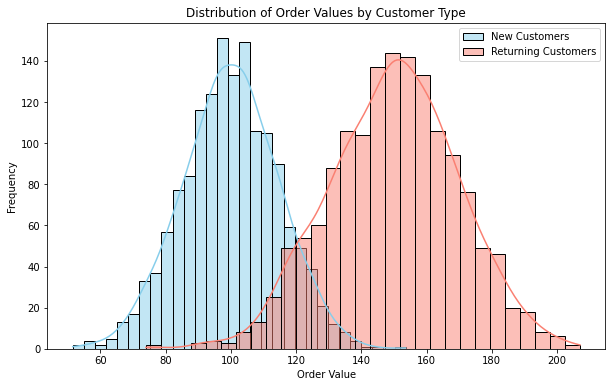

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['customer_type'] == 'new']['order_value'], color='skyblue', label='New Customers', kde=True)
sns.histplot(data[data['customer_type'] == 'returning']['order_value'], color='salmon', label='Returning Customers', kde=True)

plt.title('Distribution of Order Values by Customer Type')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Conduct a Hypothesis Test

In [3]:
from scipy.stats import ttest_ind

# Separate data by customer type for testing
new_customers = data[data['customer_type'] == 'new']['order_value']
returning_customers = data[data['customer_type'] == 'returning']['order_value']

# Perform two-sample T-test
t_stat, p_value = ttest_ind(returning_customers, new_customers)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 78.75190894139287
P-value: 0.0


*Interpret Results*

- If the p-value is less than your chosen significance level (α = 0.05), you can reject the null hypothesis, meaning there’s a significant difference in average order values between the two groups.
- If the p-value is greater than 0.05, you fail to reject the null hypothesis, suggesting that the data does not provide enough evidence of a difference